In [2]:
#import geopandas as gpd

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


import numpy as np

In [3]:
unnorm_data = pd.read_csv("national_data_with_null_unnormalized.csv").dropna()

unnorm_data.keys()

Index(['Unnamed: 0', 'County Name', 'Overdoses', 'Hospitals', 'Median_Age',
       'Average_Family_Size', 'Number of Roads', 'Traffic_Volume',
       'Population', 'Population_Density', 'Area_Sq_Miles',
       'Number of Pharmacies', 'Number of Local Law Enforcements',
       'Number of Fire Departments', 'Crude Depression Prevalence Estimate',
       'Percent_Male', 'Shannon_Weiner', 'Percent_H'],
      dtype='object')

In [4]:
unnorm_data = unnorm_data.loc[unnorm_data.groupby('County Name')['Population'].idxmax()].reset_index(drop=True)
unnorm_data = unnorm_data[unnorm_data['Overdoses'] > 0]

In [5]:
data = pd.read_csv("national_data_normalized.csv").drop(['Unnamed: 0', 'Population_Density_Norm'], axis=1).dropna()

In [6]:
data = data.rename(columns={"Shannon_Weiner" : "Diversity Entropy", "Percent_H" : "Percent_Hispanic"})

In [7]:
data = data[data['Overdoses'] != 0]
data = data[data['Traffic_Norm'] != 1]

In [8]:
data = data[data['County Name'] != 'KING']
data = data[data['County Name'] != 'KAUAI']
data = data[data['County Name'] != "HAWAII"]


In [9]:
data.keys()

Index(['Hospital_Norm', 'Traffic_Norm', 'Enforcement_Norm', 'Fire_Norm',
       'Roads_Norm', 'Median_Age_Norm',
       'Crude Depression Prevalence Estimate_Norm', 'Average_Family_Size_Norm',
       'Diversity Entropy', 'Percent_Male', 'Percent_Hispanic', 'Overdoses',
       'County Name'],
      dtype='object')

(-0.0001, 0.0015)

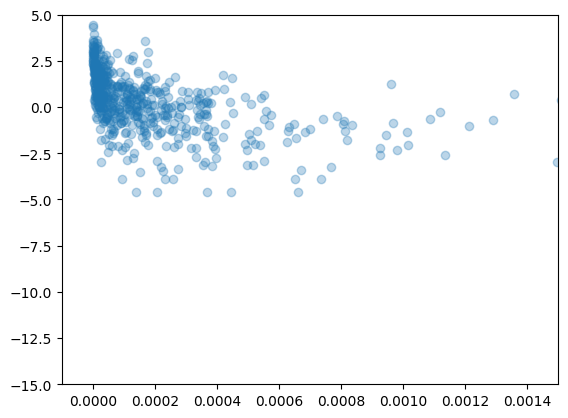

In [14]:
plt.scatter(data['Fire_Norm']*2, np.log(data['Overdoses']/1000), alpha=0.3)
plt.ylim(-15, 5)
plt.xlim(-0.0001, 0.0015)

(-15.0, 5.0)

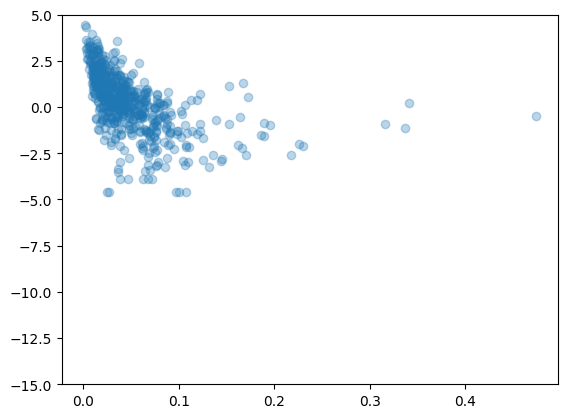

In [23]:
plt.scatter(data['Traffic_Norm']*2, np.log(data['Overdoses']/1000), alpha=0.3)
plt.ylim(-15, 5)
#plt.xlim(-0.0001, 0.0015)

(-1.0, 2.0)

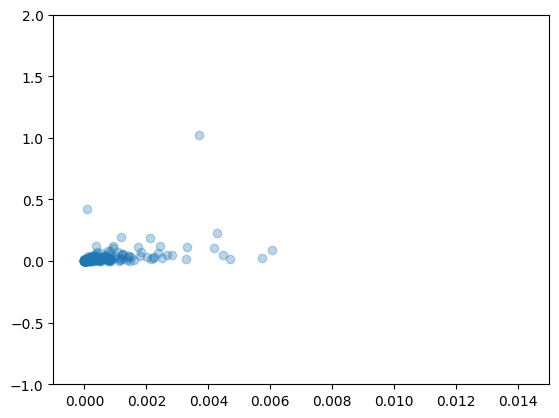

In [64]:
plt.scatter(1000*unnorm_data['Number of Fire Departments']/unnorm_data['Population'], 1000*unnorm_data['Overdoses']/unnorm_data['Population'], alpha=0.3)
plt.xlim(-0.001, 0.015)
plt.ylim(-1,2)

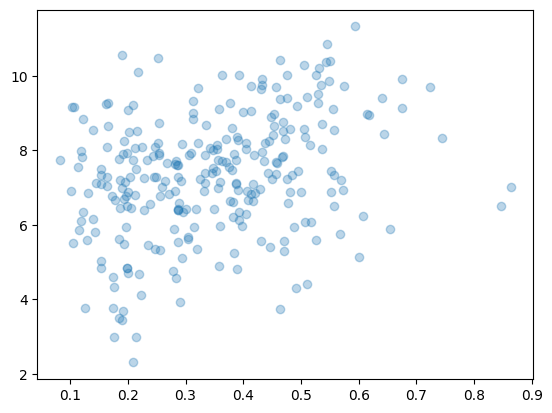

In [17]:
plt.scatter(unnorm_data['Shannon_Weiner'], np.log(unnorm_data['Overdoses']), alpha=0.3)


In [ ]:
matrix = data.drop(['Overdoses', 'County Name', ], axis=1)
y = data['Overdoses']

model = RandomForestRegressor(n_estimators=100)

# Initialize the RFE model with the logistic regression model and the number of desired features
num_features_to_select = 5  # You can change this to the number of features you want to keep
rfe = RFE(model, step=1)

# Fit the RFE model to your data
rfe.fit(matrix, y)

# Get the selected features
selected_features = rfe.support_

# You can also get the ranking of each feature, where 1 is the most important
feature_ranking = rfe.ranking_

# Now, you can use the selected features for further analysis
matrix.keys()[selected_features]

Index(['Traffic_Norm', 'Fire_Norm',
       'Crude Depression Prevalence Estimate_Norm', 'Diversity Entropy',
       'Percent_Male'],
      dtype='object')

0.5781728579006302


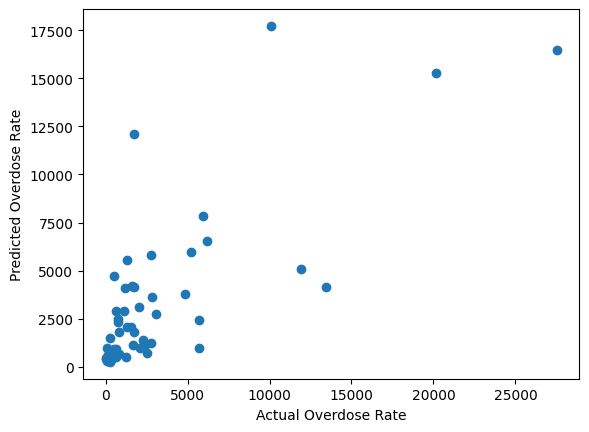

In [ ]:
X = data[list(matrix.keys()[selected_features])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Overdose Rate')
plt.ylabel('Predicted Overdose Rate')
plt.show()

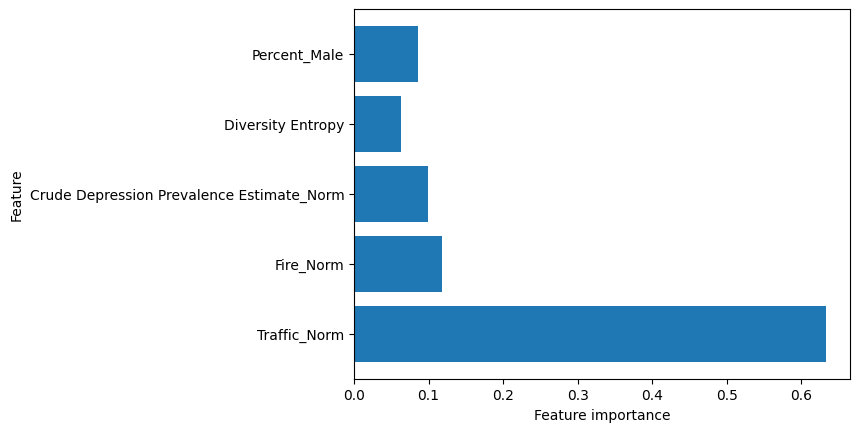

In [ ]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for _ in range(100)], axis=0)
features = X.columns
plt.barh(features, importances, xerr=std, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [21]:
import seaborn as sns

In [20]:
#import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(data[list(X.columns) + ['Overdoses']].corr(), annot=True)
plt.show()

NameError: name 'X' is not defined

<Figure size 800x600 with 0 Axes>

In [18]:
data['log_over'] = np.log(data['Overdoses'])

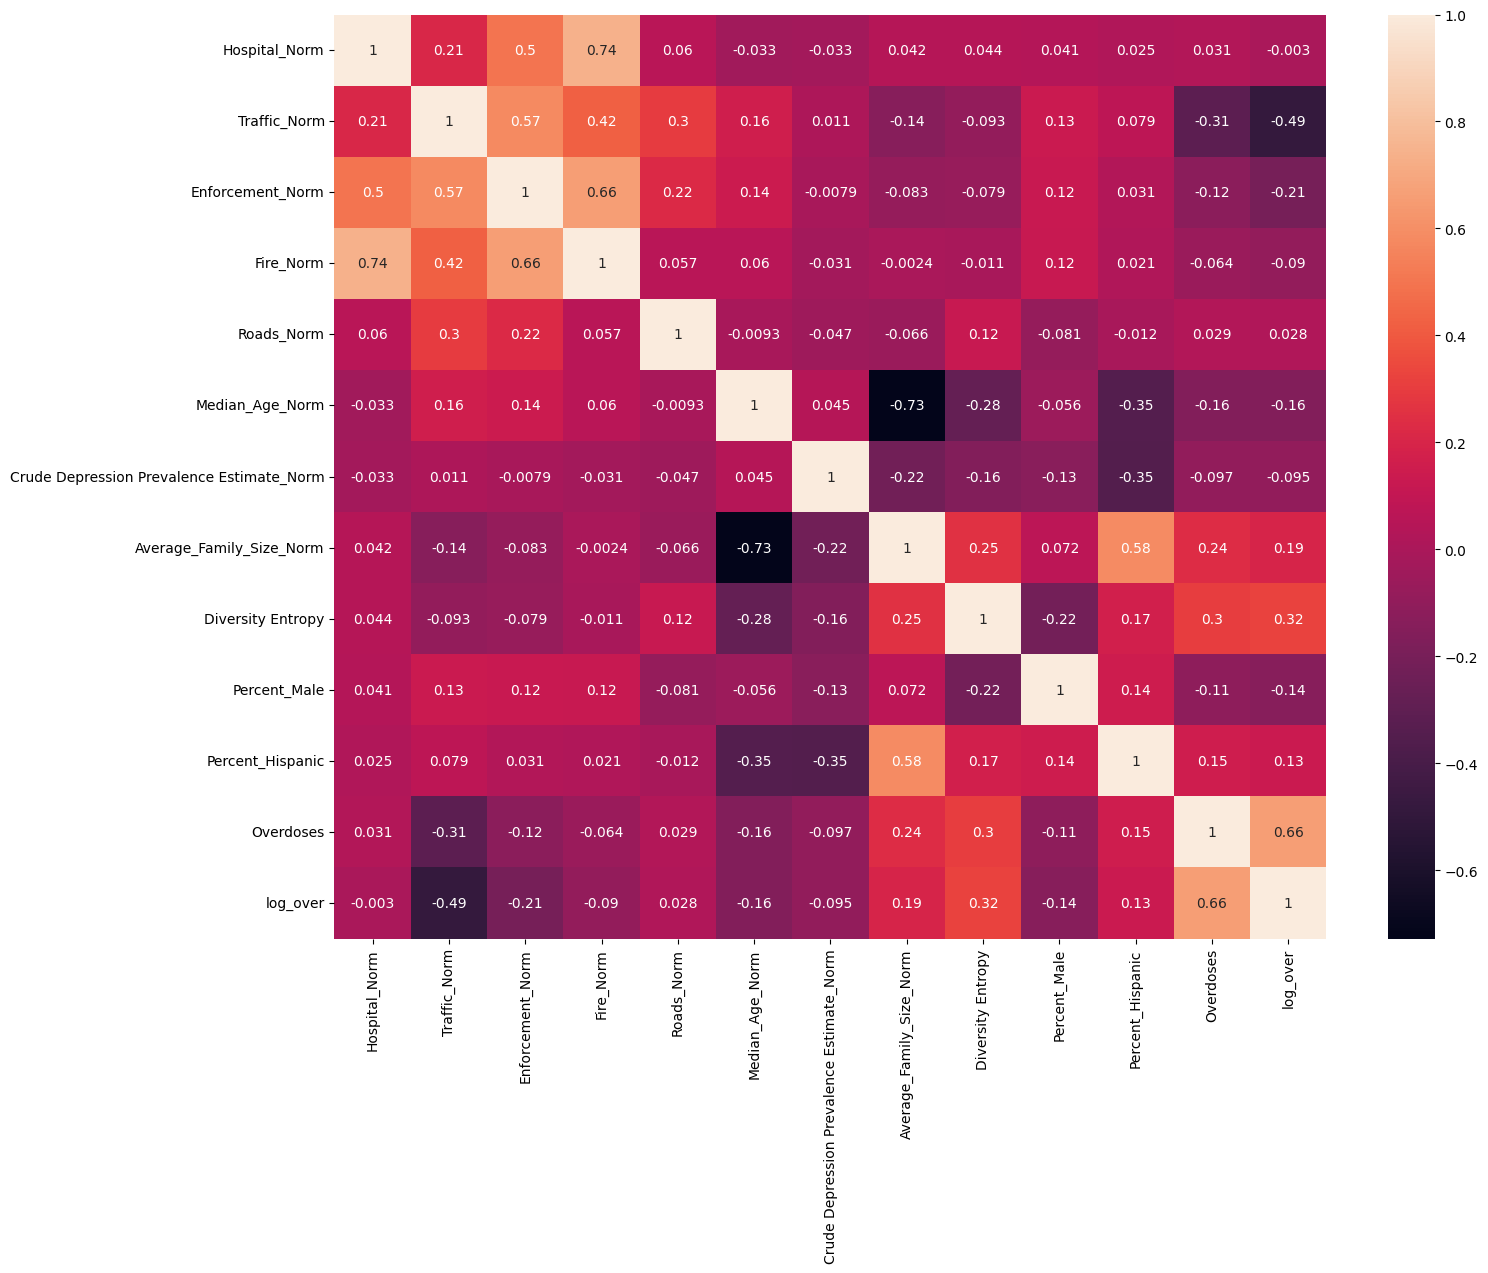

In [22]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

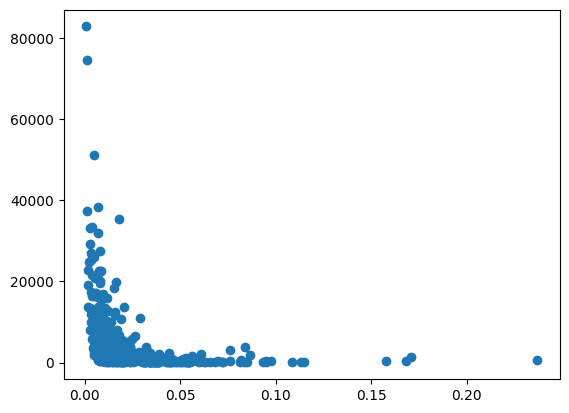

In [ ]:
plt.scatter(data['Traffic_Norm'], data['Overdoses'])

In [ ]:
# Load the geographic data for US counties
county_shapes = gpd.read_file('counties.geojson')  # Replace with the path to your geographic data file

In [ ]:
county_shapes['NAME'] = county_shapes['NAME'].str.upper()

In [ ]:
# Merge your data with the county shapes data based on county name and state
merged_data = county_shapes.merge(data, left_on=['NAME'], right_on=['County Name'], how='right')


In [ ]:
merged_data.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Fire_Norm,Roads_Norm,Median_Age_Norm,Crude Depression Prevalence Estimate_Norm,Average_Family_Size_Norm,Diversity Entropy,Percent_Male,Percent_Hispanic,Overdoses,County Name
0,16,001,00395066,0500000US16001,16001,ADA,06,2724902770,21961614,"POLYGON ((-116.51250 43.80716, -116.28202 43.8...",...,7.742271e-07,0.012440,0.632727,0.704861,0.767901,0.253137,0.505570,0.094801,3673.0,ADA
1,31,001,00835823,0500000US31001,31001,ADAMS,06,1458869099,2481410,"POLYGON ((-98.72439 40.68977, -98.72143 40.698...",...,1.160994e-05,0.014496,0.688210,0.638889,0.767130,0.400155,0.509347,0.423962,8314.0,ADAMS
2,18,001,00450401,0500000US18001,18001,ADAMS,06,878079474,2429955,"POLYGON ((-85.07386 40.91782, -84.80267 40.922...",...,1.160994e-05,0.014496,0.688210,0.638889,0.767130,0.400155,0.509347,0.423962,8314.0,ADAMS
3,19,003,00465191,0500000US19003,19003,ADAMS,06,1096700779,5353407,"POLYGON ((-94.92759 41.15851, -94.70059 41.158...",...,1.160994e-05,0.014496,0.688210,0.638889,0.767130,0.400155,0.509347,0.423962,8314.0,ADAMS
4,55,001,01581060,0500000US55001,55001,ADAMS,06,1672140731,108432130,"POLYGON ((-90.02595 44.09175, -89.92339 44.152...",...,1.160994e-05,0.014496,0.688210,0.638889,0.767130,0.400155,0.509347,0.423962,8314.0,ADAMS


In [ ]:
merged_data.drop_duplicates(subset=['County Name'], keep='first', inplace=True)

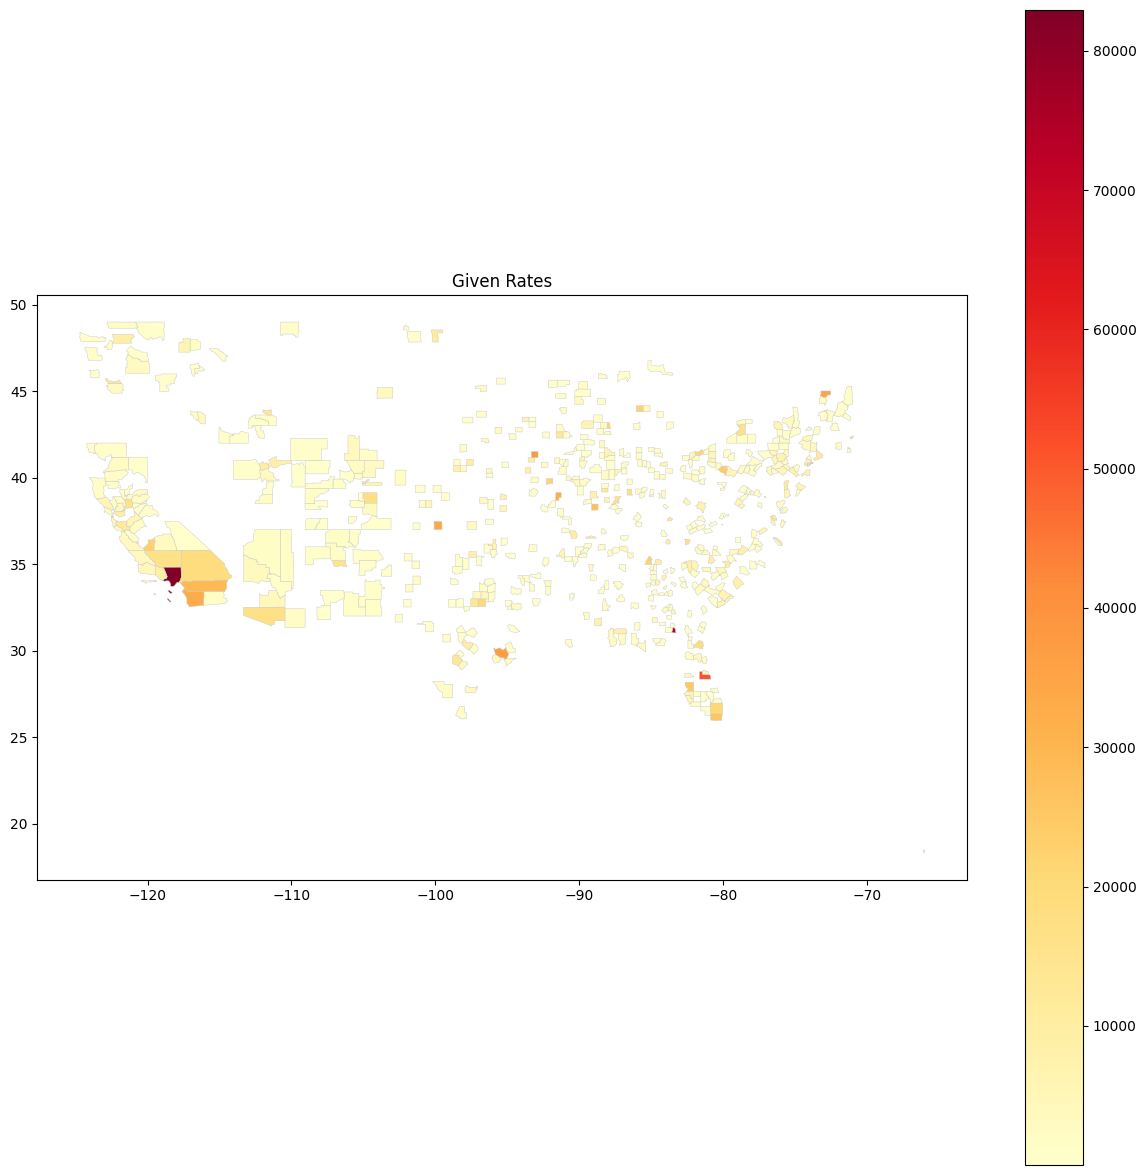

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data.plot(column='Overdoses', cmap='YlOrRd', linewidth=0.35, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Given Rates')

plt.show()

In [ ]:
full_pred = model.predict(data[list(matrix.keys()[selected_features])])

In [ ]:
merged_data['Overdoses'] = full_pred

In [ ]:
data.shape

(565, 13)

In [ ]:
merged_data.shape

(1641, 23)

In [ ]:
county_shapes.shape

(3220, 10)

In [ ]:
set(merged_data['NAME'])-set(data['County Name'])

set()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, n_iter=3000, perplexity = 15)

# Fit and transform the data
X_tsne = tsne.fit_transform(matrix)

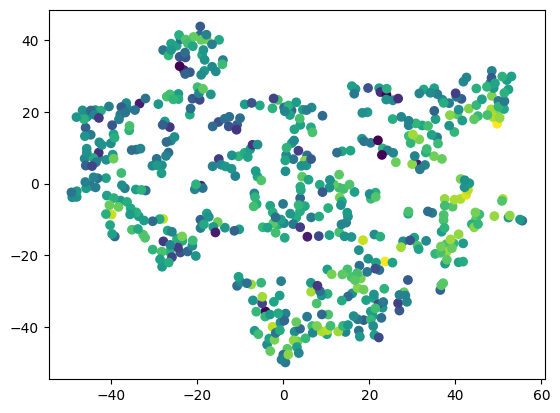

In [ ]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = np.log(data['Overdoses']))